# Notebook to gather and analyse results for excited state energies across methods and functionals

Calculations are already assumed to have been checked for convergence

In [1]:
# define useful constants
Ha2eV = 27.211396132

# define molecules
acenes = ['naphthalene', 'anthracene', 'tetracene', 'pentacene', 'hexacene']
oleds = ['NPh3', 'CBP', '2CzPN', 'ACRFLCN']
molecules = acenes + oleds
molecule_labels = {'naphthalene': 'naphthalene', 'anthracene': 'anthracene',
                   'tetracene': 'tetracene', 'pentacene': 'pentacene', 'hexacene': 'hexacene',
                   'NPh3': 'NPh$_3$', 'CBP': 'CBP', '2CzPN': '2CzPN', 'ACRFLCN': 'ACRFLCN'}

# define methods
methods = ['DSCF', 'TDDFT', 'TCDFT']
method_labels = {'DSCF': '$\Delta$SCF', 'TDDFT': 'TDDFT', 'TCDFT': 'T-CDFT'}

# define XC functionals
xcs = ['PBE', 'PBE0']

# setup results dictionary
energies = {}
for mol in molecules:
    energies[mol] = {}
    energies[mol]['Ref'] = {'S1': None, 'T1': None, 'EST': None}
    for method in methods:
        energies[mol][method] = {}
        for xc in xcs:
            energies[mol][method][xc] = {'S1': None, 'T1': None, 'EST': None}

## Reference Energies

In [2]:
# reference energies from CCSD (via Rangel et al. J. Chem. Phys. 146, 194108 (2017))
energies['naphthalene']['Ref']['S1'] = 4.81
energies['naphthalene']['Ref']['T1'] = 3.20

energies['anthracene']['Ref']['S1'] = 3.68
energies['anthracene']['Ref']['T1'] = 2.41

energies['tetracene']['Ref']['S1'] = 2.94
energies['tetracene']['Ref']['T1'] = 1.76

energies['pentacene']['Ref']['S1'] = 2.42
energies['pentacene']['Ref']['T1'] = 1.37

energies['hexacene']['Ref']['S1'] = 2.05
energies['hexacene']['Ref']['T1'] = 1.00

# reference energies from tuned range-separated TDDFT (from Sun et al. J. Chem. Theory Comput. 11, 3851, 2015)
energies['NPh3']['Ref']['S1'] = 3.98
energies['NPh3']['Ref']['T1'] = 3.37

energies['2CzPN']['Ref']['S1'] = 3.22
energies['2CzPN']['Ref']['T1'] = 2.81

energies['CBP']['Ref']['S1'] = 3.94
energies['CBP']['Ref']['T1'] = 3.28

energies['ACRFLCN']['Ref']['S1'] = 3.03
energies['ACRFLCN']['Ref']['T1'] = 2.96

for mol in molecules:
    energies[mol]['Ref']['EST'] = energies[mol]['Ref']['S1'] - energies[mol]['Ref']['T1']

## HOMO-LUMO spatial separation

In [3]:
# values are calculated in a separate notebook
lambdat = {}
for mol in molecules:
    lambdat[mol] = {}
    for xc in xcs:
        lambdat[mol][xc] = None

lambdat['naphthalene']['PBE'] = 0.89
lambdat['naphthalene']['PBE0'] = 0.88

lambdat['anthracene']['PBE'] = 0.88
lambdat['anthracene']['PBE0'] = 0.87

lambdat['tetracene']['PBE'] = 0.89
lambdat['tetracene']['PBE0'] = 0.88

lambdat['pentacene']['PBE'] = 0.89
lambdat['pentacene']['PBE0'] = 0.88

lambdat['hexacene']['PBE'] = 0.90
lambdat['hexacene']['PBE0'] = 0.89

lambdat['NPh3']['PBE'] = 0.59
lambdat['NPh3']['PBE0'] = 0.61

lambdat['CBP']['PBE'] = 0.57
lambdat['CBP']['PBE0'] = 0.58

lambdat['2CzPN']['PBE'] = 0.47
lambdat['2CzPN']['PBE0'] = 0.45

lambdat['ACRFLCN']['PBE'] = 0.12
lambdat['ACRFLCN']['PBE0'] = 0.11

## Delta SCF
Read in cubic scaling DeltaSCF logfiles

In [4]:
from BigDFT import Logfiles as lf
import os

method = 'DSCF'
basis = 'cubic'

for mol in molecules:
    
    for xc in xcs:
        
        logname = mol+'/log-'+mol+'_'+str(xc)+'_S0_'+basis+'.yaml'                              
        if os.path.isfile(logname):
            run_s0 = lf.Logfile(logname)
        else:
            print('No logfile for '+logname)
            continue
        
        for state in ['T1', 'S1']:   
            logname = mol+'/log-'+mol+'_'+str(xc)+'_'+state+'_'+basis+'_dscf.yaml'
                    
            if os.path.isfile(logname):
                run = lf.Logfile(logname)
                energies[mol][method][xc][state] = Ha2eV * (run.energy - run_s0.energy)
                if state == 'S1':
                    if energies[mol][method][xc]['T1'] is None:
                        energies[mol][method][xc][state] = None
                    else:
                        energies[mol][method][xc][state] = 2.0 * energies[mol][method][xc][state] - \
                        energies[mol][method][xc]['T1']
                print('Finished reading '+logname)
            else:
                print('No logfile for '+logname)
                 
    print('')          

Finished reading naphthalene/log-naphthalene_PBE_T1_cubic_dscf.yaml
Finished reading naphthalene/log-naphthalene_PBE_S1_cubic_dscf.yaml
Finished reading naphthalene/log-naphthalene_PBE0_T1_cubic_dscf.yaml
Finished reading naphthalene/log-naphthalene_PBE0_S1_cubic_dscf.yaml

Finished reading anthracene/log-anthracene_PBE_T1_cubic_dscf.yaml
Finished reading anthracene/log-anthracene_PBE_S1_cubic_dscf.yaml
Finished reading anthracene/log-anthracene_PBE0_T1_cubic_dscf.yaml
Finished reading anthracene/log-anthracene_PBE0_S1_cubic_dscf.yaml

Finished reading tetracene/log-tetracene_PBE_T1_cubic_dscf.yaml
Finished reading tetracene/log-tetracene_PBE_S1_cubic_dscf.yaml
Finished reading tetracene/log-tetracene_PBE0_T1_cubic_dscf.yaml
Finished reading tetracene/log-tetracene_PBE0_S1_cubic_dscf.yaml

Finished reading pentacene/log-pentacene_PBE_T1_cubic_dscf.yaml
Finished reading pentacene/log-pentacene_PBE_S1_cubic_dscf.yaml
Finished reading pentacene/log-pentacene_PBE0_T1_cubic_dscf.yaml
Finish

## TDDFT
Read in TDDFT outputs from NWChem

In [5]:
import nwchem
import importlib

method = 'TDDFT'
basis = 'VTZ'

for mol in molecules:

    for xc in xcs:

        logname = mol+'/'+mol+'_'+str(xc)+'_'+basis+'_tda.out'

        if os.path.isfile(logname):
            
            for state in ['T1', 'S1']:   
                
                energies[mol][method][xc][state] = nwchem.get_etd_from_nwchem(logname, None, state, 10)
                
            print('Finished reading '+logname)
                        
        else:
            print('No logfile for '+logname)
                 
    print('')          

Finished reading naphthalene/naphthalene_PBE_VTZ_tda.out
Finished reading naphthalene/naphthalene_PBE0_VTZ_tda.out

Finished reading anthracene/anthracene_PBE_VTZ_tda.out
Finished reading anthracene/anthracene_PBE0_VTZ_tda.out

Finished reading tetracene/tetracene_PBE_VTZ_tda.out
Finished reading tetracene/tetracene_PBE0_VTZ_tda.out

Finished reading pentacene/pentacene_PBE_VTZ_tda.out
Finished reading pentacene/pentacene_PBE0_VTZ_tda.out

Finished reading hexacene/hexacene_PBE_VTZ_tda.out
Finished reading hexacene/hexacene_PBE0_VTZ_tda.out

Finished reading NPh3/NPh3_PBE_VTZ_tda.out
Finished reading NPh3/NPh3_PBE0_VTZ_tda.out

Finished reading CBP/CBP_PBE_VTZ_tda.out
Finished reading CBP/CBP_PBE0_VTZ_tda.out

Finished reading 2CzPN/2CzPN_PBE_VTZ_tda.out
Finished reading 2CzPN/2CzPN_PBE0_VTZ_tda.out

Finished reading ACRFLCN/ACRFLCN_PBE_VTZ_tda.out
Finished reading ACRFLCN/ACRFLCN_PBE0_VTZ_tda.out



## T-CDFT
Read in linear scaling T-CDFT logfiles

In [6]:
from BigDFT import Logfiles as lf
import os

method = 'TCDFT'
basis = 'SF_sp_spd_8.0'

for mol in molecules:
    
    for xc in xcs:
        if xc == 'PBE0':
            continue
        
        logname = mol+'/log-'+mol+'_'+str(xc)+'_S0_'+basis+'.yaml'                              
        if os.path.isfile(logname):
            run_s0 = lf.Logfile(logname)
            
            print('Finished reading '+logname)
        else:
            print('No logfile for ', logname)
            continue
        
        for state in ['T1', 'S1']:   
            logname = mol+'/log-'+mol+'_'+str(xc)+'_'+state+'_'+basis+'_tcdft.yaml'
                    
            if os.path.isfile(logname):
                run = lf.Logfile(logname)
                
                # hack for mixed constraints, where the energy is read from a different field
                if (mol == 'naphthalene' or mol == 'anthracene' or mol == 'tetracene'
                            or mol == 'pentacene' or mol == 'hexacene') and state == 'S1':
                    e = run.log['Ground State Optimization'][4]['support function optimization'][1]['Omega']['ENERGY']
                    energies[mol][method][xc][state] = Ha2eV * (e - run_s0.energy)
                else:
                    energies[mol][method][xc][state] = Ha2eV * (run.energy - run_s0.energy)

                print('Finished reading '+logname)
            else:
                print('No logfile for ', logname)
                 
    print('')          

Finished reading naphthalene/log-naphthalene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading naphthalene/log-naphthalene_PBE_T1_SF_sp_spd_8.0_tcdft.yaml
Finished reading naphthalene/log-naphthalene_PBE_S1_SF_sp_spd_8.0_tcdft.yaml

Finished reading anthracene/log-anthracene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading anthracene/log-anthracene_PBE_T1_SF_sp_spd_8.0_tcdft.yaml
Finished reading anthracene/log-anthracene_PBE_S1_SF_sp_spd_8.0_tcdft.yaml

Finished reading tetracene/log-tetracene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading tetracene/log-tetracene_PBE_T1_SF_sp_spd_8.0_tcdft.yaml
Finished reading tetracene/log-tetracene_PBE_S1_SF_sp_spd_8.0_tcdft.yaml

Finished reading pentacene/log-pentacene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading pentacene/log-pentacene_PBE_T1_SF_sp_spd_8.0_tcdft.yaml
Finished reading pentacene/log-pentacene_PBE_S1_SF_sp_spd_8.0_tcdft.yaml

Finished reading hexacene/log-hexacene_PBE_S0_SF_sp_spd_8.0.yaml
Finished reading hexacene/log-hexacene_PBE_T1_SF_sp_spd_8.0_t

## Get singlet-triplet splittings

In [7]:
for mol in molecules:
    for method in methods:
        for xc in xcs: 
            if energies[mol][method][xc]['S1'] is None or energies[mol][method][xc]['T1'] is None:
                energies[mol][method][xc]['EST'] = None
            else:
                energies[mol][method][xc]['EST'] = energies[mol][method][xc]['S1']\
                                                 - energies[mol][method][xc]['T1']

## Extract mean absolute deviations (MADs)

In [8]:
def get_mads(molecules, methods, xcs, states=['S1', 'T1', 'EST']):
    # setup MAD dictionary
    mad = {}
    nmad = {}
    for method in methods:
        mad[method] = {}
        nmad[method] = {}
        for xc in xcs:
            mad[method][xc] = {'S1': 0.0, 'T1': 0.0, 'EST': 0.0}
            nmad[method][xc] = {'S1': 0, 'T1': 0, 'EST': 0}

    # get MAD
    for mol in molecules:
        for method in methods:
            for xc in xcs: 
                for state in states:
                    if energies[mol][method][xc][state] is not None:
                        mad[method][xc][state] += abs(energies[mol][method][xc][state]\
                                                      - energies[mol]['Ref'][state])
                        nmad[method][xc][state] += 1

    for method in methods:
        for xc in xcs: 
            for state in states:
                if nmad[method][xc][state] == 0:
                    mad[method][xc][state] = None 
                else:
                    mad[method][xc][state] /= nmad[method][xc][state]
                    
    return mad

## Results Table

In [9]:
import pandas as pd
from IPython.display import display

def get_table(molecules, methods, xcs, mad, states=['S1', 'T1', 'EST']):
    table_methods = ['Ref.']
    table_xcs = ['']
    table_states = ['$S_1$', '$T_1$', '$\Delta E_{\mathrm{ST}}$']

    for xc in xcs:
        table_methods.append('$\Lambda_T$')
        table_xcs.append(xc)
        for method in methods:  
            if method == 'TCDFT' and xc == 'PBE0':
                continue
            table_methods.append(method)
            table_xcs.append(xc)

    arrays = [table_xcs, table_methods]
    columns = pd.MultiIndex.from_arrays(arrays, names=['', ''])

    rows = pd.MultiIndex.from_product([molecules + ['MAD'], table_states], names=['Molecule', 'State'])

    table_data = []

    for mol in molecules:

        for state in states:
            table_row = []

            table_row.append('{0:.2f}'.format(energies[mol]['Ref'][state]))

            for xc in xcs:
                
                if state == 'T1':
                    table_row.append('{0:.2f}'.format(lambdat[mol][xc]))    
                else:
                    table_row.append('')

                for method in methods: 

                    if method == 'TCDFT' and xc == 'PBE0':
                        continue

                    if energies[mol][method][xc][state] is None:
                        table_row.append('-')
                    else:        
                        table_row.append('{0:.2f}'.format(energies[mol][method][xc][state]))                

            table_data.append(table_row)

    for state in states:
        table_row = ['']
        for xc in xcs:
            table_row.append('')
            for method in methods:
                if method == 'TCDFT' and xc == 'PBE0':
                    continue
                if mad[method][xc][state] is None:
                    table_row.append('')
                else:
                    table_row.append('{0:.2f}'.format(mad[method][xc][state]))

        table_data.append(table_row)

    table = pd.DataFrame(table_data, index=rows, columns=columns)

    return table

In [10]:
acene_mads = get_mads(acenes, methods, xcs, states=['S1', 'T1', 'EST'])
acenes_table = get_table(acenes, methods, xcs, acene_mads)
acenes_table
#print(acenes_table.to_latex(index=False)) 

PBE                    \
                                      Ref. $\Lambda_T$  DSCF TDDFT TCDFT   
Molecule    State                                                          
naphthalene $S_1$                     4.81              3.75  4.24  4.41   
            $T_1$                     3.20        0.89  2.98  2.94  2.96   
            $\Delta E_{\mathrm{ST}}$  1.61              0.77  1.30  1.45   
anthracene  $S_1$                     3.68              2.61  3.10  3.15   
            $T_1$                     2.41        0.88  1.99  1.97  1.97   
            $\Delta E_{\mathrm{ST}}$  1.27              0.62  1.13  1.17   
tetracene   $S_1$                     2.94              1.88  2.34  2.32   
            $T_1$                     1.76        0.89  1.34  1.33  1.32   
            $\Delta E_{\mathrm{ST}}$  1.18              0.54  1.01  1.00   
pentacene   $S_1$                     2.42              1.37  1.81  1.77   
            $T_1$                     1.37        0.89  0.89  0.88  0.88   
            $\Delta E_{\mathrm{ST}}$  1.05              0.48  0.93  0.89   
hexacene    $S_1$                     2.05              1.01  1.42  1.37   
            $T_1$                     1.00        0.90  0.57  0.56  0.55   
            $\Delta E_{\mathrm{ST}}$  1.05              0.44  0.86  0.82   
MAD         $S_1$                                       1.06  0.60  0.58   
            $T_1$                                       0.39  0.41  0.41   
            $\Delta E_{\mathrm{ST}}$                    0.66  0.19  0.17   

                                            PBE0              
                                     $\Lambda_T$  DSCF TDDFT  
Molecule    State                                             
naphthalene $S_1$                                 4.42  4.53  
            $T_1$                           0.88  3.10  2.96  
            $\Delta E_{\mathrm{ST}}$              1.32  1.57  
anthracene  $S_1$                                 3.24  3.45  
            $T_1$                           0.87  2.07  2.01  
            $\Delta E_{\mathrm{ST}}$              1.16  1.44  
tetracene   $S_1$                                 2.46  2.68  
            $T_1$                           0.88  1.39  1.36  
            $\Delta E_{\mathrm{ST}}$              1.07  1.32  
pentacene   $S_1$                                 1.93  2.14  
            $T_1$                           0.88  0.91  0.90  
            $\Delta E_{\mathrm{ST}}$              1.02  1.24  
hexacene    $S_1$                                 1.55  1.74  
            $T_1$                           0.89  0.56  0.56  
            $\Delta E_{\mathrm{ST}}$              0.98  1.18  
MAD         $S_1$                                 0.46  0.27  
            $T_1$                                 0.34  0.39  
            $\Delta E_{\mathrm{ST}}$              0.12  0.13

In [11]:
oled_mads = get_mads(oleds, methods, xcs, states=['S1', 'T1', 'EST'])
oleds_table = get_table(oleds, methods, xcs, oled_mads)
oleds_table
#print(oleds_table.to_latex(index=False)) 

PBE                    \
                                   Ref. $\Lambda_T$  DSCF TDDFT TCDFT   
Molecule State                                                          
NPh3     $S_1$                     3.98              3.13  3.20  3.46   
         $T_1$                     3.37        0.59  3.00  2.93  3.19   
         $\Delta E_{\mathrm{ST}}$  0.61              0.13  0.27  0.28   
CBP      $S_1$                     3.94              2.81  2.71  3.27   
         $T_1$                     3.28        0.57  2.58  2.42  2.95   
         $\Delta E_{\mathrm{ST}}$  0.66              0.23  0.29  0.33   
2CzPN    $S_1$                     3.22              2.72  2.26  3.28   
         $T_1$                     2.81        0.47  2.49  2.06  3.07   
         $\Delta E_{\mathrm{ST}}$  0.41              0.23  0.20  0.21   
ACRFLCN  $S_1$                     3.03              2.82  1.79  3.21   
         $T_1$                     2.96        0.12  2.81  1.78  3.20   
         $\Delta E_{\mathrm{ST}}$  0.07              0.01  0.01  0.01   
MAD      $S_1$                                       0.67  1.05  0.36   
         $T_1$                                       0.38  0.81  0.25   
         $\Delta E_{\mathrm{ST}}$                    0.29  0.24  0.23   

                                         PBE0              
                                  $\Lambda_T$  DSCF TDDFT  
Molecule State                                             
NPh3     $S_1$                                 3.67  3.85  
         $T_1$                           0.61  3.47  3.27  
         $\Delta E_{\mathrm{ST}}$              0.19  0.58  
CBP      $S_1$                                 3.81  3.48  
         $T_1$                           0.58  2.98  2.84  
         $\Delta E_{\mathrm{ST}}$              0.83  0.64  
2CzPN    $S_1$                                 3.60  2.99  
         $T_1$                           0.45  2.78  2.64  
         $\Delta E_{\mathrm{ST}}$              0.82  0.36  
ACRFLCN  $S_1$                                 3.15  2.66  
         $T_1$                           0.11  3.06  2.65  
         $\Delta E_{\mathrm{ST}}$              0.09  0.01  
MAD      $S_1$                                 0.24  0.30  
         $T_1$                                 0.14  0.26  
         $\Delta E_{\mathrm{ST}}$              0.26  0.04

## Plot MADs

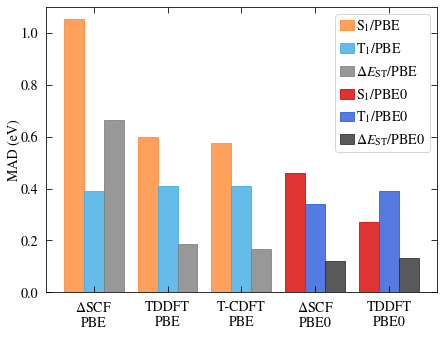

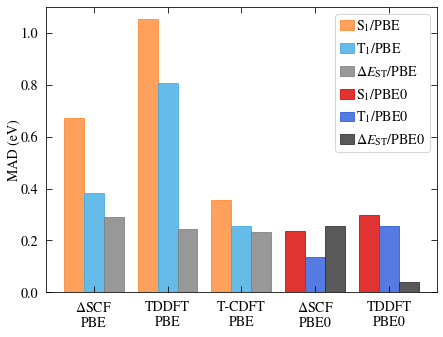

In [12]:
import plotting
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
get_ipython().run_line_magic('matplotlib', 'inline')

font_size = plotting.font_size

def plot_mads(ax, mads, methods, xcs, states=['S1', 'T1', 'EST'], ylabel='MAD (eV)', ytlabel='DEFAULT'):
    
    state_labels = {'S1': 'S$_1$', 'T1': 'T$_1$', 'EST': '$\Delta E_{\mathrm{ST}}$'}
    state_colors = {'S1': {'PBE': plotting.colorso[2], 'PBE0': plotting.colorso[1]},
                    'T1': {'PBE': plotting.colorsb[2], 'PBE0': plotting.colorsb[1]},
                    'EST': {'PBE': '#7F7F7F', 'PBE0': '#2F2F2F'}}
    
    x0 = 0.0
    all_labels = []
    all_x = []
    for xc in xcs:
        labels = []
        for method in methods:
            if method == 'TCDFT' and xc == 'PBE0':
                continue
            labels.append(method_labels[method]+'\n'+xc)
            
        x = np.arange(len(labels))
        width = 0.27
   
        for s,state in enumerate(states):
            mad_plot = []
            
            for method in methods:
                if method == 'TCDFT' and xc == 'PBE0':
                    continue
                if mads[method][xc][state] == None:
                    mad_plot.append(0.0)
                else:
                    mad_plot.append(mads[method][xc][state])

            rects = ax.bar(x0 + x + (2 * s - 2) * width / 2.0, mad_plot, width,
                           label=state_labels[state]+'/'+xc, alpha=0.8)

            j = 0
            for method in methods:
                if method == 'TCDFT' and xc == 'PBE0':
                    continue
                rects[j].set_color(state_colors[state][xc])
                j += 1
            
        all_labels += labels
        for ix in x:
            all_x.append(x0 + ix)
        x0 = len(x)

    plotting.set_plot_parameters(ax, ylabel=ylabel, dy=0.2, xlabel='NONE', ytlabel=ytlabel, ymin=0.0, ymax=1.1, 
                                 key_loc='upper right', labelspacing=0.5, xloc=1.02, vs=1.03, ncol=1)
    ax.set_xticks(all_x)
    ax.set_xticklabels(all_labels)

plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1, 1, figsize=(2.0 * plotting.fig_width, 1.5 * plotting.fig_width))
plot_mads(axs, acene_mads, methods, xcs)
plt.savefig('figures/mad_acenes.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1, 1, figsize=(2.0 * plotting.fig_width, 1.5 * plotting.fig_width))
plot_mads(axs, oled_mads, methods, xcs) #, ylabel='NONE', ytlabel='NOLABEL')
plt.savefig('figures/mad_oleds.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Plot difference between T-CDFT and TDDFT vs CT parameter

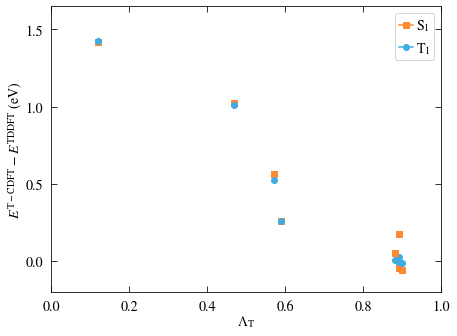

In [13]:
def plot_cdft_v_tddft(ax, lambdat, energies, molecules, xc, smarker, tmarker, scolor, tcolor):

    for m,mol in enumerate(molecules):
        if energies[mol]['TCDFT'][xc]['S1'] is not None and energies[mol]['TCDFT'][xc]['T1'] is not None\
              and energies[mol]['TDDFT'][xc]['S1'] is not None and energies[mol]['TDDFT'][xc]['T1'] is not None:
                
            s1 = energies[mol]['TCDFT'][xc]['S1'] - energies[mol]['TDDFT'][xc]['S1']
            t1 = energies[mol]['TCDFT'][xc]['T1'] - energies[mol]['TDDFT'][xc]['T1']
            
            if m == 0:
                ax.plot(lambdat[mol][xc], s1, marker=smarker, color=scolor, label='S$_1$')
                ax.plot(lambdat[mol][xc], t1, marker=tmarker, color=tcolor, label='T$_1$')
            else:
                ax.plot(lambdat[mol][xc], s1, marker=smarker, color=scolor)
                ax.plot(lambdat[mol][xc], t1, marker=tmarker, color=tcolor)
        

plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1, 1, figsize=(2.0 * plotting.fig_width, 1.5 * plotting.fig_width))

xc = 'PBE'
plot_cdft_v_tddft(axs, lambdat, energies, molecules, xc, 's', 'o', plotting.colorso[2], plotting.colorsb[2])

plotting.set_plot_parameters(axs, xmin=0.0, xmax=1.0, ymin=-0.2, ymax=1.65, dx=0.2, dy=0.5,
                             xlabel='$\Lambda_{\mathrm{T}}$', 
                             ylabel='$E^{\mathrm{T-CDFT}} - E^{\mathrm{TDDFT}}$ (eV)', 
                             key_loc='upper right', labelspacing=0.5, ncol=1)
    
plt.savefig('figures/ct_fig.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Plot trend in acene excitation energies

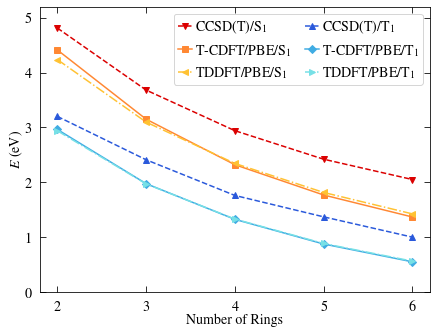

In [14]:
def plot_rings(ax, energies, acenes, method, xc, state, color, marker, ls, label):
    
    plot_energies = []
    for mol in acenes:
        if method == 'Ref':
            plot_energies.append(energies[mol][method][state])
        else:
            plot_energies.append(energies[mol][method][xc][state])
        
    ax.plot([m + 2 for m in range(len(plot_energies))], plot_energies,
            color=color, ls=ls, marker=marker, label=label)
    

plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1, 1, figsize=(2.0 * plotting.fig_width, 1.5 * plotting.fig_width))

plot_rings(axs, energies, acenes, 'Ref', 'PBE', 'S1', plotting.colorso[1], 'v', '--', 'CCSD(T)/S$_1$')
plot_rings(axs, energies, acenes, 'TCDFT', 'PBE', 'S1', plotting.colorso[2], 's', '-', 'T-CDFT/PBE/S$_1$')
plot_rings(axs, energies, acenes, 'TDDFT', 'PBE', 'S1', plotting.colorso[3], '<', '-.', 'TDDFT/PBE/S$_1$')

plot_rings(axs, energies, acenes, 'Ref', 'PBE', 'T1', plotting.colorsb[1], '^', '--', 'CCSD(T)/T$_1$')
plot_rings(axs, energies, acenes, 'TCDFT', 'PBE', 'T1', plotting.colorsb[2], 'D', '-', 'T-CDFT/PBE/T$_1$')
plot_rings(axs, energies, acenes, 'TDDFT', 'PBE', 'T1', plotting.colorsb[3], '>', '-.', 'TDDFT/PBE/T$_1$')

plotting.set_plot_parameters(axs, ymin=0.0, ymax=5.2, dy=1.0, dx=1, xlabel='Number of Rings',
                             ylabel='$E$ (eV)', key_loc='upper right', labelspacing=0.5, ncol=2)

plt.savefig('figures/acene_trend.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Plot excitation energy landscape

In [15]:
def plot_st_energies(ax, molecule, energies, xcs, plot_ref=False, emin=0.0, fontsize=14, lw=2):
    method_labels = {'DSCF': '$\Delta$SCF', 'TDDFT': 'TDDFT', 'TCDFT': 'T-CDFT'}
    
    det = 0.02
    dy = 0.02
    
    dx = 1.0
    ddx = 0.1
    x = 0.0
    
    mx = []
    
    labels = {'S1': 'S$_1$', 'T1': 'T$_1$'}
                
    if plot_ref:
        for state in ['S1', 'T1']:
            if state == 'S1':
                color = plotting.colorso[3]
            else:
                color = plotting.colorsb[3]
                
            ax.hlines(energies[molecule]['Ref'][state], -1000, 1000, linestyles='--', color=color, lw=lw)

    for i,xc in enumerate(xcs):
        
        mxmin = x
        
        for method in ['DSCF', 'TDDFT', 'TCDFT']:
            
            if (method == 'TCDFT' and xc == 'PBE0'):
                continue
            
            for state in ['S1', 'T1']:
                
                if state == 'S1':
                    color = plotting.colorso[2 - i]
                else:
                    color = plotting.colorsb[2 - i]
            
                e = energies[molecule][method][xc][state]

                if e is not None:
                    ax.hlines(e, x + ddx, x + dx - ddx, color=color, lw=lw)
                
                if state == 'S1':
                    if method == 'TCDFT':
                        fontweight = 'bold'
                    else:
                        fontweight = 'normal'
                    ax.text(x + 0.5 * dx, emin - 0.4, method_labels[method], ha='center', va='bottom',
                            fontweight=fontweight)
                
            x += dx
    
        mxmax = x
        mx.append([mxmin - ddx, mxmax + ddx])
        
    xmin = 0.0
    xmax = x
    
    # for key
    for state in ['S1', 'T1']:
        if plot_ref:
            if state == 'S1':
                color = plotting.colorso[3]
            else:
                color = plotting.colorsb[3]
                
            ax.axhline(-1000, ls='--', color=color, label=labels[state]+'/Ref', lw=lw)
        
        for i,xc in enumerate(xcs):
            if state == 'S1':
                color = plotting.colorso[2-i]
            else:
                color = plotting.colorsb[2-i]
    
            label = labels[state]+'/'+xc
        
            ax.axhline(-1000, color=color, label=label, lw=lw)

    return xmin - ddx, xmax, mx

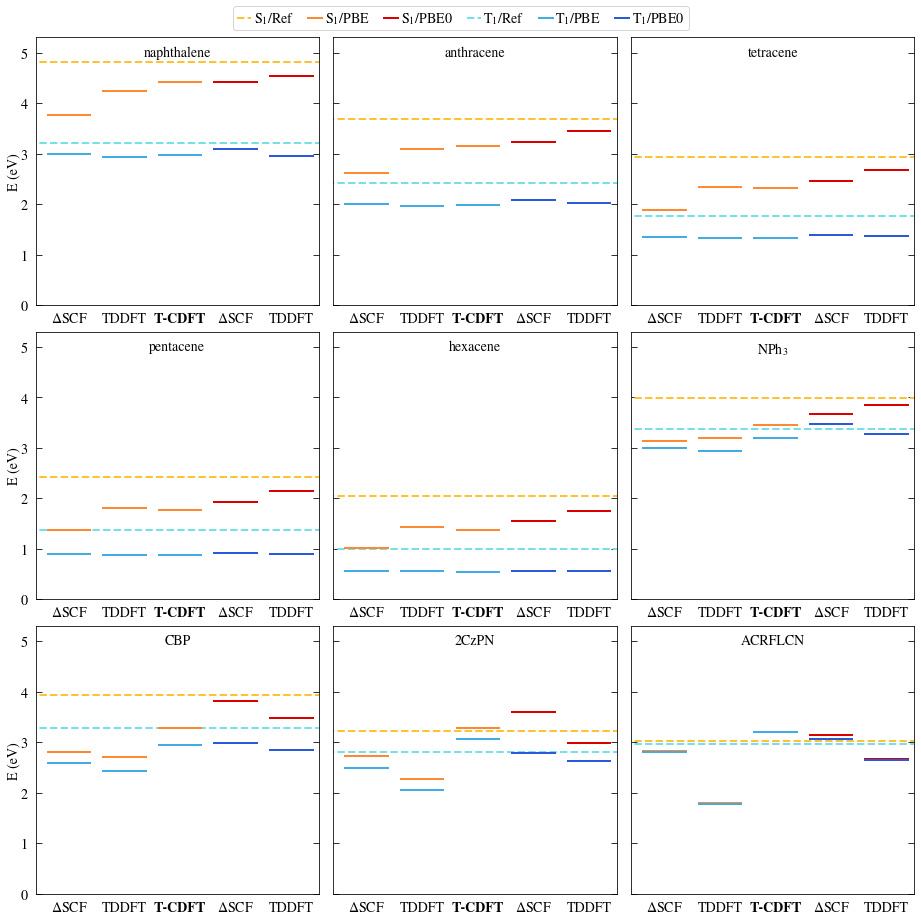

In [16]:
plt.rcParams.update({'font.size': font_size})

ncol = 3
nrow = int(np.ceil((len(acenes) + len(oleds))/float(ncol)))

fig, axs = plt.subplots(nrow, ncol, figsize=(ncol * 1.5 * plotting.fig_width, nrow * 1.5 * plotting.fig_width))

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.1)

ymin = 0.0
ymax = 5.3
dy = 1.0

for m,molecule in enumerate(acenes + oleds):
    i = m // ncol
    j = m % ncol
    
    ax = axs[i][j]
    
    ax.text(0.5, 0.97, molecule_labels[molecule], transform=ax.transAxes, ha='center', va='top')
    xmin, xmax, mx = plot_st_energies(ax, molecule, energies, xcs, plot_ref=True, fontsize=font_size)

    if m == 0:
        key_loc = 'above'
    else:
        key_loc = 'NONE'
        
    if j == 0:
        ylabel = 'E (eV)'
        ytlabel = 'DEFAULT'
    else:
        ylabel = ''
        ytlabel = 'NOLABEL'
        
    plotting.set_plot_parameters(ax, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, dx='NONE',
                                 xlabel='NONE', ylabel=ylabel, dy=dy, ytlabel=ytlabel,
                                 key_loc=key_loc, labelspacing=0.5, xloc=1.5, vs=1.03, ncol=6)

plt.savefig('figures/excitation_energies.pdf', format='pdf', dpi=300, bbox_inches='tight')

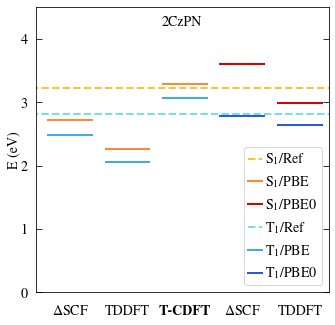

In [17]:
# example of plotting energy landscape for an individual molecule
molecule = '2CzPN'

plt.rcParams.update({'font.size': font_size})
fig, axs = plt.subplots(1, 1, figsize=(1.5 * plotting.fig_width, 1.5 * plotting.fig_width))

axs.text(0.5, 0.97, molecule_labels[molecule], transform=axs.transAxes, ha='center', va='top')
xmin, xmax, mx = plot_st_energies(axs, molecule, energies, xcs, plot_ref=True, fontsize=font_size)

plotting.set_plot_parameters(axs, xmin=xmin, xmax=xmax, ymin=0.0, ymax=4.5, dx='NONE',
                             xlabel='NONE', ylabel='E (eV)', dy=1.0,
                             key_loc='lower right', labelspacing=0.5,
                             xloc=1.01, vs=1.03, ncol=1)
        
plt.savefig('figures/'+molecule+'_energies.pdf', format='pdf', dpi=300, bbox_inches='tight')